In [5]:
using Revise
using BiMDPs

In [6]:
dir = "case010"

"case010"

In [7]:
rgw = case_dictionary[dir]

BiMDPs.RoverWorld.RoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles_grid: Array{Float64}((10, 10, 20)) [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; -5.0 -5.0 … 0.0 0.0; -5.0 -5.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; -5.0 -5.0 … -5.0 0.0; … ; -5.0 -5.0 … -5.0 0.0; -5.0 -5.0 … -5.0 0.0;;; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 -5.0; … ; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 0.0]
  exit_xys: Array{Tuple{Int64, Int64}}((1,))
  include_measurement: Bool false
  measure_reward: Float64 0.0


## Plot rewards grid

In [4]:
RoverWorld.create_reward_field_evolution_gif(rgw; dir=dir)

"case010/reward_evolution.gif"

## Do one instance of a solve with Fine-grained MDP

In [14]:
using Random
rng = Random.seed!(11)
s0 = RoverWorld.rand_starting_state(rng, rgw)
comp_time, r, sar_history = solve_using_finegrained_mdp(rgw, max_iters=100, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

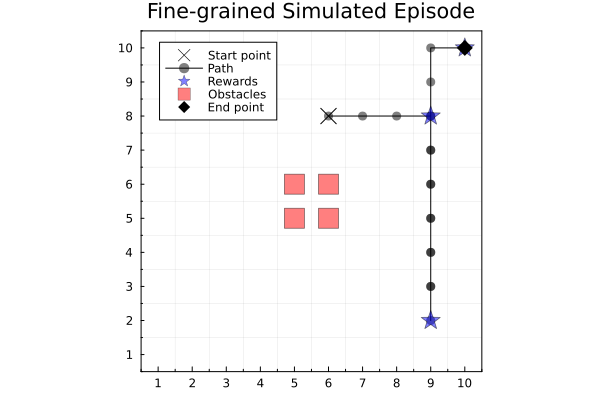

In [15]:
BiMDPs.plot_finegrained_simulated_episode(rgw, sar_history, dir=dir)

## Do one instance of a solve with Bi-Level MDP

In [16]:
using Random
rng = Random.seed!(11)
s0 = RoverWorld.rand_starting_state(rng, rgw)
comp_time, r, sar_history = solve_using_bilevel_mdp(rgw, max_iters=100, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

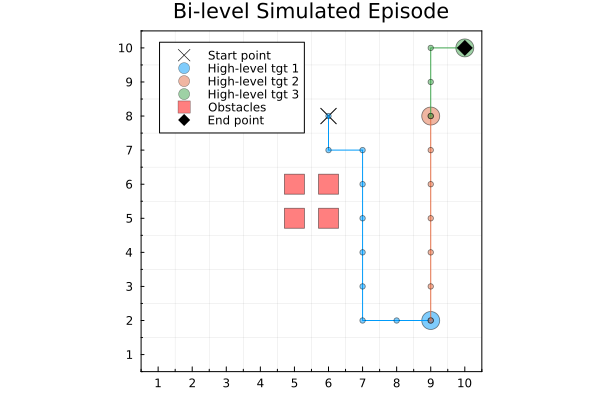

In [17]:
BiMDPs.plot_bilevel_simulated_episode(rgw, sar_history, dir=dir)

## Compare optimality vs computation time


In [15]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1], 100)])

Reward of bl_vi after 100 simulations: μ = -6.88335144207463, σ = 5.994580977080616


Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 1 entry:
  "bl_vi" => ([0.0662666], [-6.88335], [5.99458])

In [ ]:
results = optimality_vs_compute(rgw, [("bl_vi", [1, 5, 10, 50, 100, 150], 100), ("vi", [1, 5, 50, 100, 150], 500), ("qlearning", [50,50000], 500), ("sarsa", [50,50000], 500)])

Reward of bl_vi after 100 simulations: μ = -2.6560842838865564, σ = 18.36546961155998
Reward of bl_vi after 100 simulations: μ = 13.88860483796585, σ = 31.506002721762645
Reward of bl_vi after 100 simulations: μ = 58.232953477422114, σ = 22.798364663861385
Reward of bl_vi after 100 simulations: μ = 62.90689480011129, σ = 11.752810309885673
Reward of bl_vi after 100 simulations: μ = 62.75183260135313, σ = 12.14434237785455
Reward of bl_vi after 100 simulations: μ = 64.39943961956202, σ = 12.44224979495763
Reward of vi after 500 simulations: μ = -0.12712558558796133, σ = 20.21982506871463
Reward of vi after 500 simulations: μ = 29.51660863303857, σ = 33.587657576767725
Reward of vi after 500 simulations: μ = 61.63340798847271, σ = 18.651726900200078

In [ ]:
RoverWorld.plot_optimality_vs_compute(results, dir = dir)

## Test HL MDP

In [11]:
using POMDPs
using DiscreteValueIteration
hl_mdp = BiMDPs.HighLevelMDP(rgw)
hl_solver = ValueIterationSolver(max_iterations=100)
hl_policy = solve(hl_solver, hl_mdp);

## View stepthrough of one HL policy

In [12]:
s0 = HLRoverWorld.HLState(6,7,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

4-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(6, 7, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 15, Bool[1, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 18, Bool[1, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [13]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 105.0.


## Another example

In [14]:
s0 = HLRoverWorld.HLState(1,9,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(1, 9, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [15]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 55.0.


## From a non-starting state

In [16]:
s0 = HLRoverWorld.HLState(9,8,10,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

2-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [17]:
s0 = HLRoverWorld.HLState(9,7,9,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 7, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)